In [1]:
# linear algebra & EDA
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# machine learning with ensemble method
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# persistence model
import pickle


In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df.drop('timecc', axis=1, inplace=True)

In [4]:
# data exploration and visualizations
df.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,matchid,championid,ss1,ss2,support,adc,position_JUNGLE,position_MID,position_TOP,duo
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,10,19,4,11,0,0,1,0,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,10,267,3,4,1,0,0,0,0,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,10,119,7,4,0,1,0,0,0,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,10,114,12,4,0,0,0,0,1,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,10,112,4,3,0,0,0,1,0,0


In [5]:
df.columns

Index(['id', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'totdmgtaken',
       'magicdmgtaken', 'physdmgtaken', 'truedmgtaken', 'goldearned',
       'goldspent', 'turretkills', 'inhibkills', 'totminionskilled',
       'neutralminionskilled', 'ownjunglekills', 'enemyjunglekills',
       'totcctimedealt', 'champlvl', 'pinksbought', 'wardsplaced',
       'wardskilled', 'firstblood', 'matchid', 'championid', 'ss1', 'ss2',
       'support', 'adc', 'position_JUNGLE', 'position_MID', 'positi

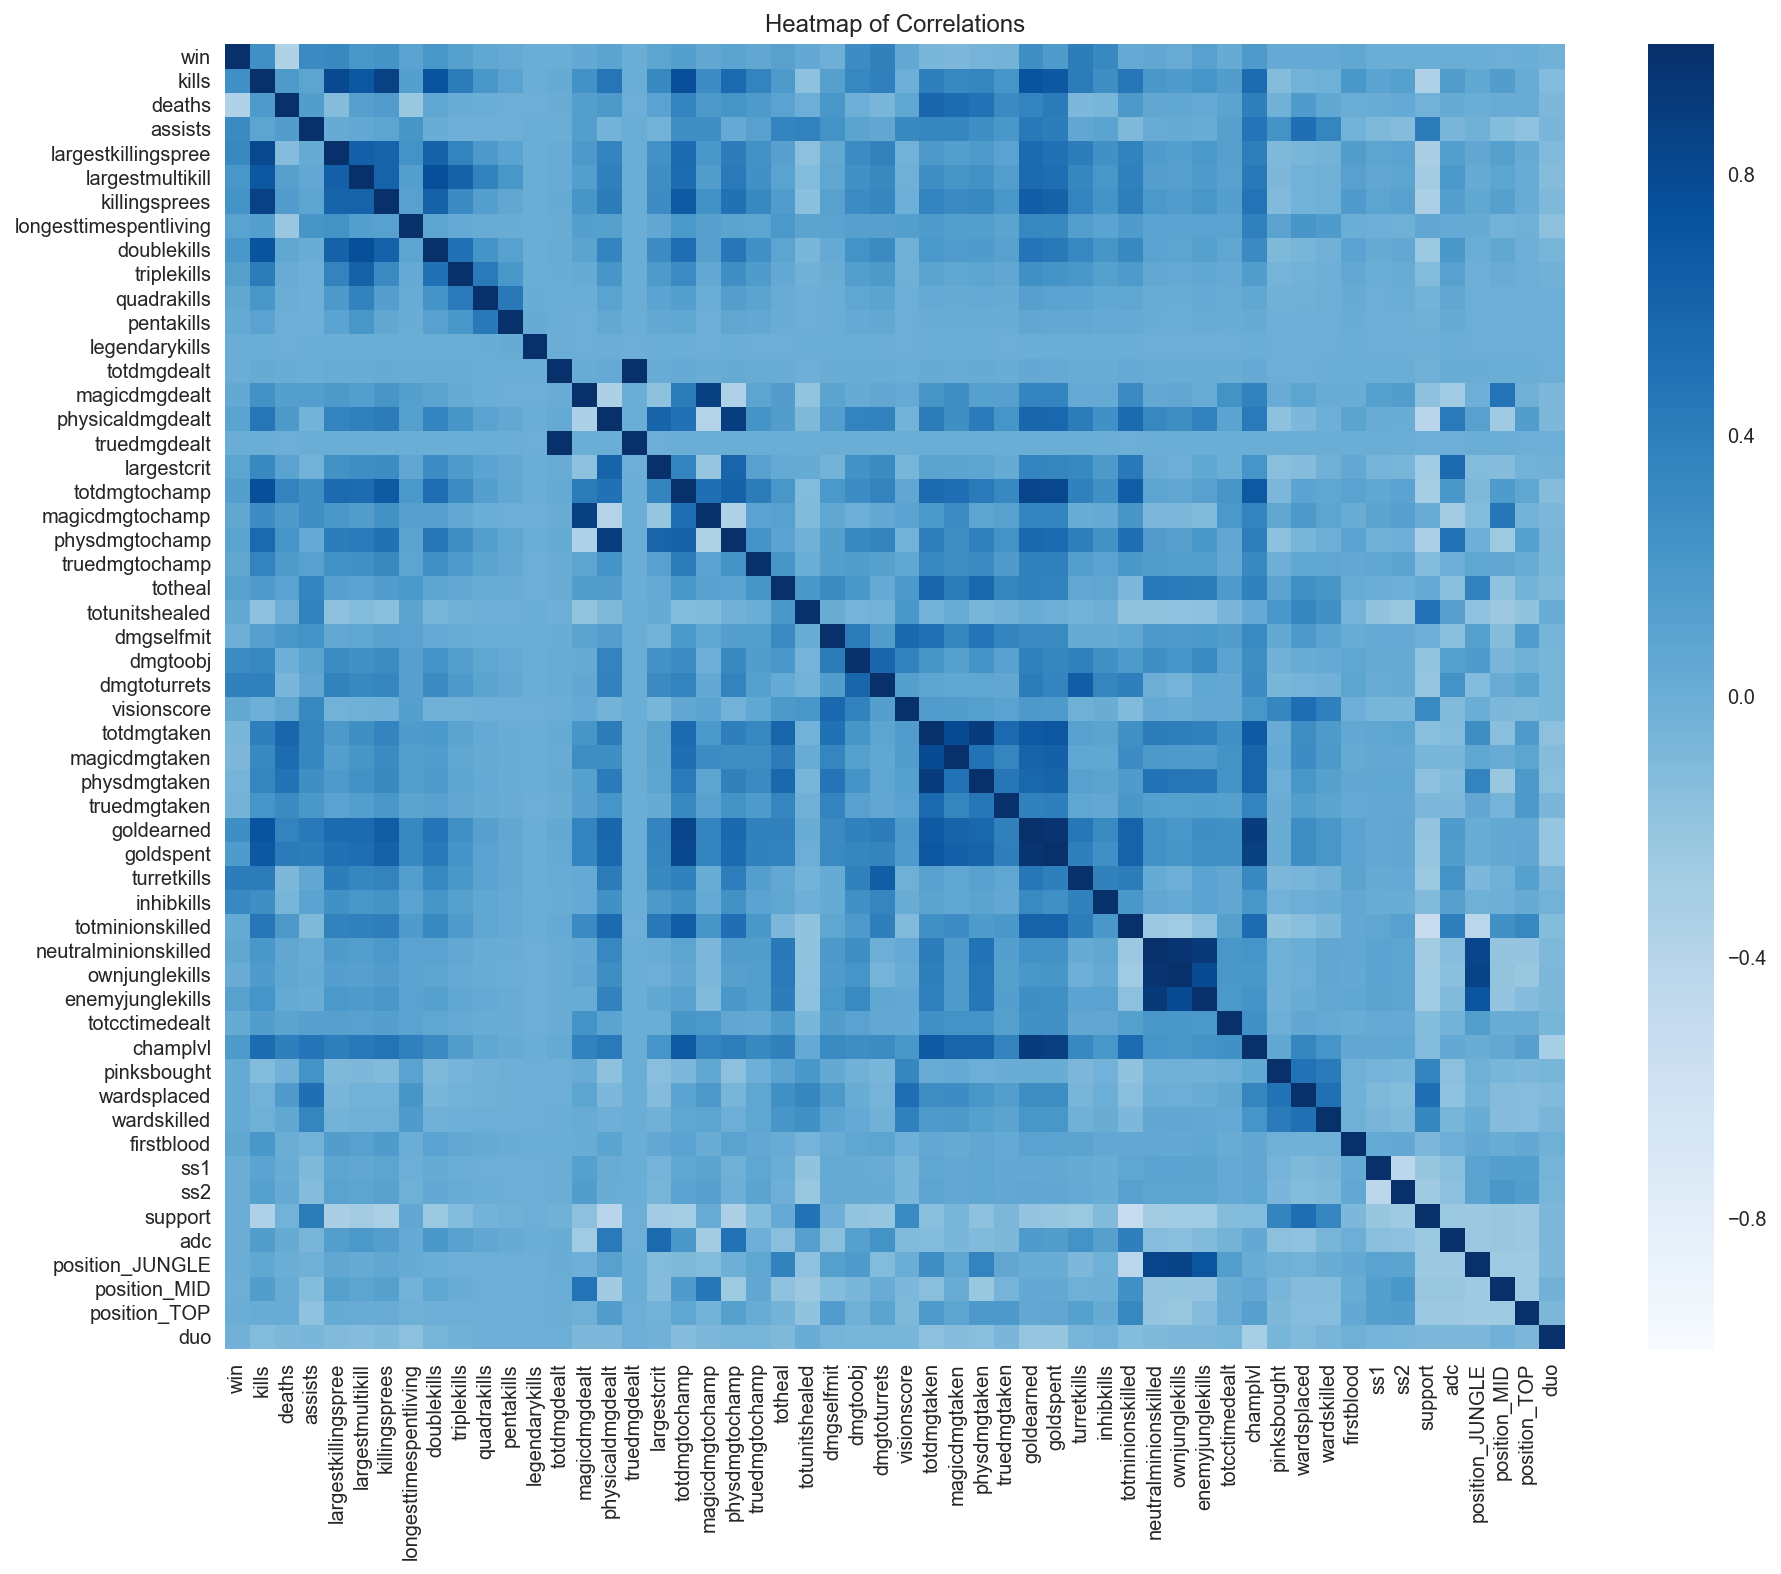

In [6]:
identity_columns = ['id','matchid','item1','item2','item3','item4','item5','item6','trinket','championid']
visualization_df = df[[i for i in df.columns if i not in identity_columns]]

plt.figure(figsize=(15, 12))
sns.heatmap(visualization_df.corr(), cmap='Blues')
plt.title('Heatmap of Correlations')

In [10]:
visualization_df.corr()['win'].values

array([  1.00000000e+00,   2.59828122e-01,  -3.65521383e-01,
         3.04558558e-01,   3.13959630e-01,   2.05601040e-01,
         2.33403566e-01,   1.09341158e-01,   2.02111671e-01,
         1.25803337e-01,   6.28567191e-02,   3.18175690e-02,
         1.04413006e-03,   6.76074119e-03,   4.08263209e-02,
         9.43056818e-02,   1.29961710e-03,   7.87361365e-02,
         1.39144790e-01,   5.75434762e-02,   9.76283114e-02,
         5.65393082e-02,   1.11758896e-01,   4.27272999e-02,
        -1.21373633e-02,   2.84969288e-01,   3.82417792e-01,
         5.13876745e-02,  -7.55301027e-02,  -9.15546597e-02,
        -4.75707505e-02,  -4.38058308e-02,   2.71422199e-01,
         1.68140966e-01,   4.12427705e-01,   3.26914780e-01,
         3.88883493e-02,   5.78009987e-02,   1.58526693e-02,
         1.15878573e-01,   2.98484695e-02,   1.79497341e-01,
         3.25374493e-02,   3.13885114e-02,   3.71466831e-02,
         6.31276105e-02,   3.10840099e-03,   2.86454987e-03,
         5.15976370e-03,

<Container object of 3 artists>

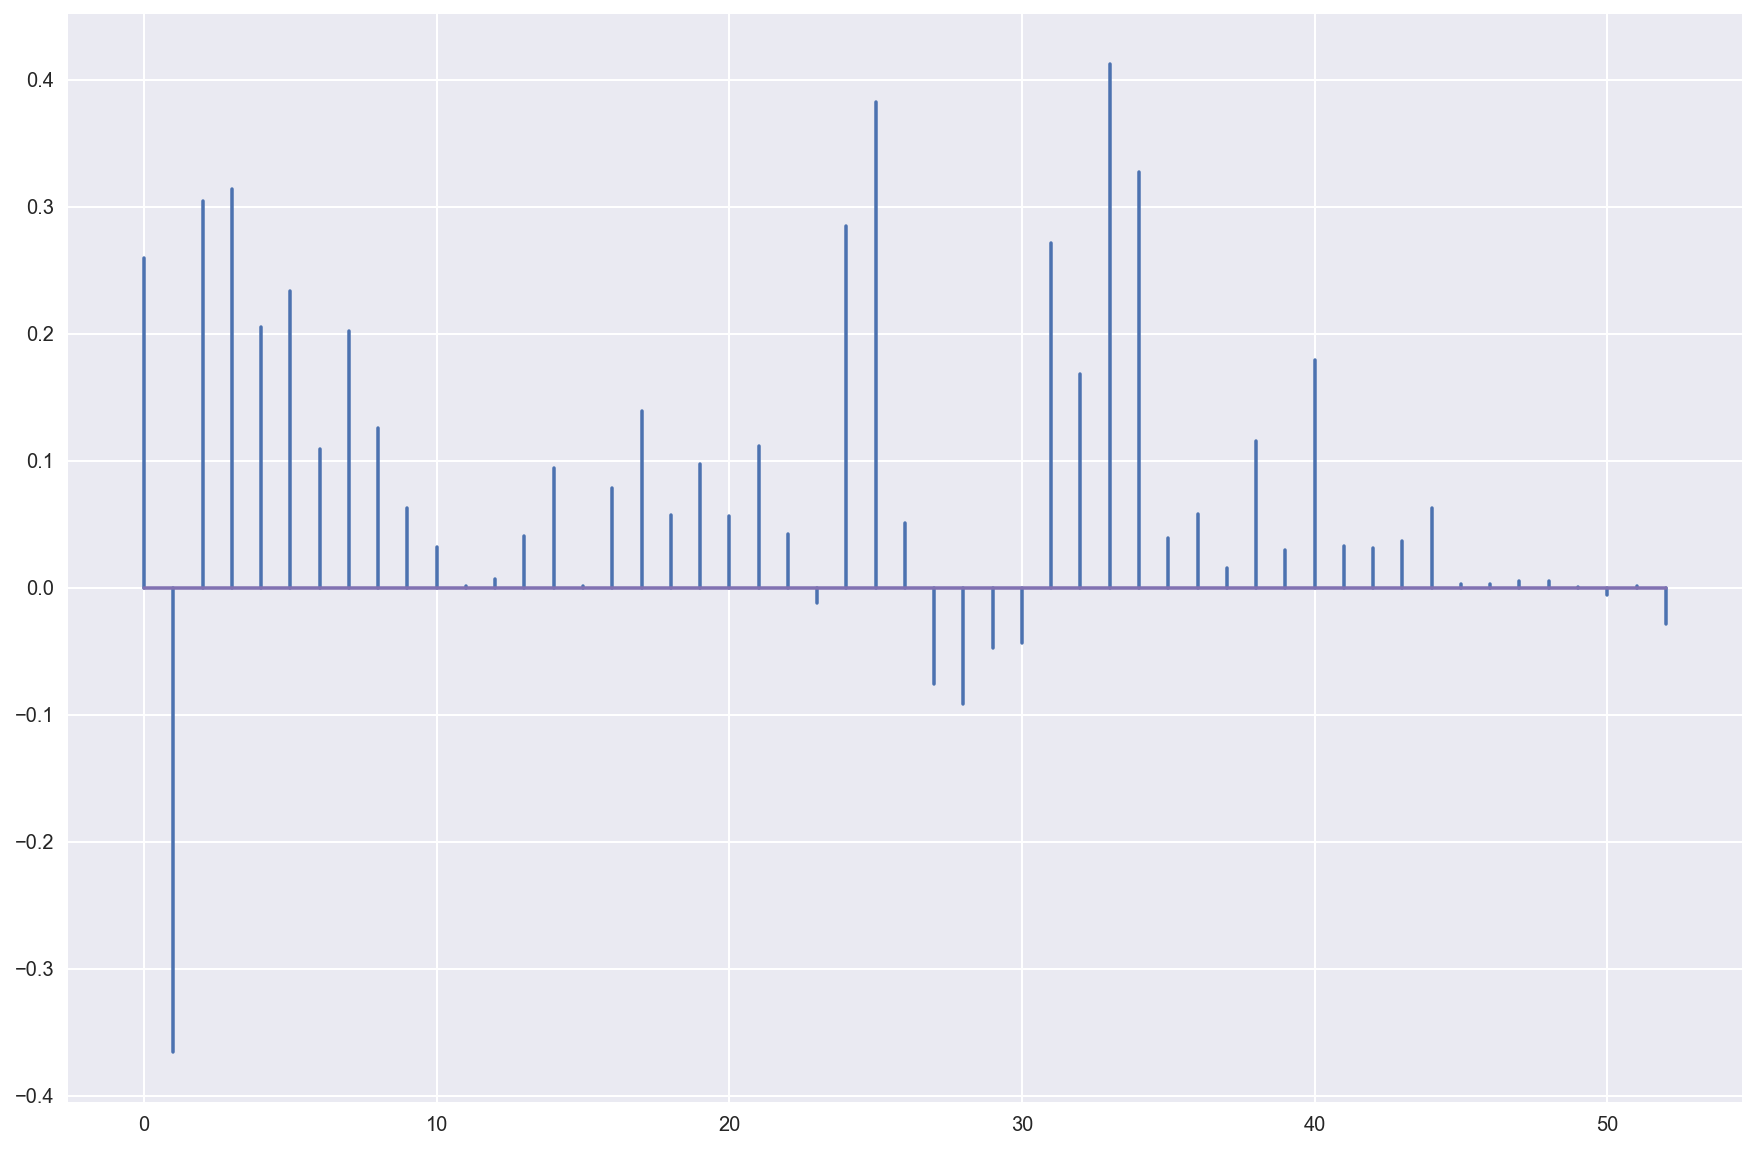

In [21]:
plt.figure(figsize=(15,10))
ticks = [i for i in visualization_df.columns]
plt.stem(visualization_df.corr()['win'].values[1:], markerfmt=' ', bottom=0)

In [22]:
X = df[[i for i in df.columns if i not in ['id', 'win']]]
y = df.win.values

In [23]:
rf = RandomForestClassifier(n_estimators=300)
gb = GradientBoostingClassifier(n_estimators=150)

print('Gradient Boosting', cross_val_score(gb, X, y, cv = 3, n_jobs=-1).mean())
print('Random Forest', cross_val_score(rf, X, y, cv = 3, n_jobs=-1).mean())

Gradient Boosting 0.879055903124
Random Forest 0.885378548592


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 33)

In [25]:
clf = RandomForestClassifier(n_estimators=1000, n_jobs=4)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=4, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [26]:
clf.score(X_test, y_test)


0.8864771166299632

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
prediction = clf.predict(X_test)

In [30]:
confusion_matrix(y_test, prediction)

array([[200666,  28468],
       [ 23597, 205899]])

In [32]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.89      0.88      0.89    229134
          1       0.88      0.90      0.89    229496

avg / total       0.89      0.89      0.89    458630



In [33]:
from sklearn.externals import joblib
joblib.dump(clf, 'trained_model.pkl') # 17 GB what???!

['trained_model.pkl']